CELLA DI IMPORTAZIONE DELLE LIBRERIE e del file con la topografia

In [1]:

import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import math


topografia = 'topografia_definitivo.csv'

Lettura dei dati

In [2]:
df = pd.read_csv(topografia, sep=";")

x = df['x']
y = df['y']
z = df['z']

I dati che servono per visualizzare correttamente la mappa e il limite. Possono essere modificati a piacere.

In [7]:
#PER IL PIANO
immersione = 40
inclinazione = 40

#PER L'EQUIDISTANZA DELLE ISOIPSE
PRINCIPALI = 100
SECONDARIE = 10

IL CODICE CHE GENERA IL LIMITE, LA MAPPA E IL PIANO. NON MODIFICARE

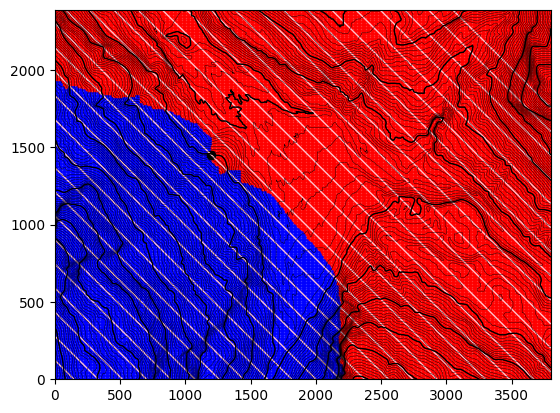

In [8]:
#crea le liste per le isoipse
levels = []
sublevels = []
for i in range(0,4000, PRINCIPALI): levels.append(i)
for i in range(0,4000, SECONDARIE): sublevels.append(i)


#calcola il piano e aggiunge i valori
inclinazione = np.radians(inclinazione)
immersione = np.radians(immersione)
x0 = 1200
y0 = 1450
z0 = 1600

Xpiano = []
Ypiano = []
Zpiano = []

for i in range(len(df)):
    Xpiano.append(x[i])
    Ypiano.append(y[i])
    Zpiano.append(z0 - np.tan(inclinazione)*(np.sin(immersione)*(x[i]-x0)+np.cos(immersione)*(y[i]-y0)))


#CREA LE AREE SOPRA E SOTTO AL LIMITE
xsu = []
ysu = []
xgiu = []
ygiu = []
for i in range(len(df)):
    if z[i] > Zpiano[i]:
        xsu.append(x[i])
        ysu.append(y[i])
    if z[i] <= Zpiano[i]:
        xgiu.append(x[i])
        ygiu.append(y[i])



#DISEGNA LA MAPPA
fig = plt.figure()


ax = fig.add_subplot()
direttrici = ax.tricontour(df['x'], df['y'], Zpiano, levels=levels, linewidths=1, colors='pink')
principali = ax.tricontour(df['x'], df['y'], df['z'],levels=levels, linewidths=1, colors='black')
secondarie = ax.tricontour(df['x'], df['y'], df['z'],levels=sublevels, linewidths=.3, colors='black')



sopra = ax.scatter(xsu,ysu, color='red', s=1, alpha=.8)
sotto = ax.scatter(xgiu,ygiu, color='blue', s=1, alpha=.8)

punto = ax.scatter(x0,y0, color='black')
plt.show()